# GPlates Example

### Python libraries (PyGplates, Datastore wrapper, ..)

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
import pygplates
import datastorewrapper
%matplotlib inline

### Download data from datastore

In [4]:
repository='bdkd-sirca-public'
dataset='coastlines'
datastore = datastorewrapper.Datastore()
repos = datastore.list(repository)
files = datastore.files(repository, dataset)
files_folder = '/'.join(files[0].split('/')[:-1])

### Reconstructing map using PyGplates

In [5]:
PathToSampleData = '{0}/'.format(files_folder)
input_feature_filename = [PathToSampleData+'Coastlines/Seton_etal_ESR2012_Coastlines_2012.1_Polygon.gpmlz']
input_rotation_filename = [PathToSampleData+'Rotations/Seton_etal_ESR2012_2012.1.rot']
output_reconstructed_feature_filename = 'tmp.shp'
reconstruction_time = 120.6
anchor_plate = 0
pygplates.reconstruct(input_feature_filename, 
                      input_rotation_filename, 
                      reconstruction_time,
                      anchor_plate,
                      output_reconstructed_feature_filename)

### Plotting map

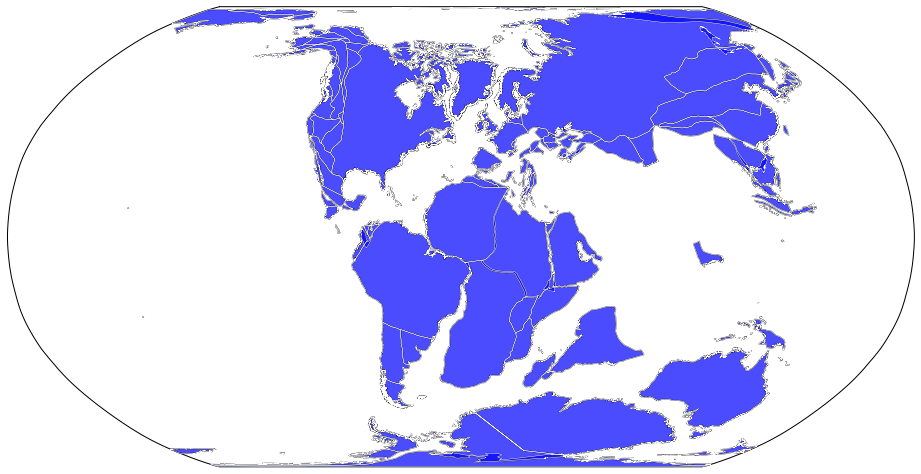

In [6]:
fig = plt.figure(figsize=(14,10))
ax_map = fig.add_axes([0,0,0.9,1.0])
m = Basemap(projection='robin', lon_0=0, resolution='c', ax=ax_map)

shp_info = m.readshapefile('tmp','shp',drawbounds=True,color='w')
    
for nshape,seg in enumerate(m.shp):
    poly = Polygon(seg,facecolor='blue',edgecolor='k',alpha=0.7)
    ax_map.add_patch(poly)
 
plt.show()